In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("ks-projects-201801.csv")
df = df.drop(columns=['ID', 'category','currency','usd pledged','usd_pledged_real','usd_goal_real'])
df['state'].replace(['failed','canceled'], 0, inplace=True)
df['state'].replace(['successful','live'], 1, inplace=True)
df

,name,main_category,deadline,goal,launched,pledged,state,backers,country
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US
...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US
378657,The Tribe,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US
378659,BioDefense Education Kit,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,US


In [3]:
df['goal rate'] = df['pledged']/df['goal']
df

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,0.080700
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,0.004889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,0.000200
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,0.065795
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,0.000500
378657,The Tribe,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,0.103333
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,0.001333
378659,BioDefense Education Kit,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,US,0.013333


In [4]:
fail_df = df[df["state"] == 0]
fail_df

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,0.080700
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,0.004889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,0.000200
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,0.065795
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,0.000500
378657,The Tribe,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,0.103333
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,0.001333
378659,BioDefense Education Kit,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,US,0.013333


Film & Video    0.163464
Publishing      0.113096
Technology      0.107109
Music           0.105950
Games           0.093891
Design          0.080195
Food            0.076872
Fashion         0.071172
Art             0.069146
Photography     0.031163
Crafts          0.027679
Comics          0.020626
Theater         0.018250
Journalism      0.015476
Dance           0.005911
Name: main_category, dtype: float64


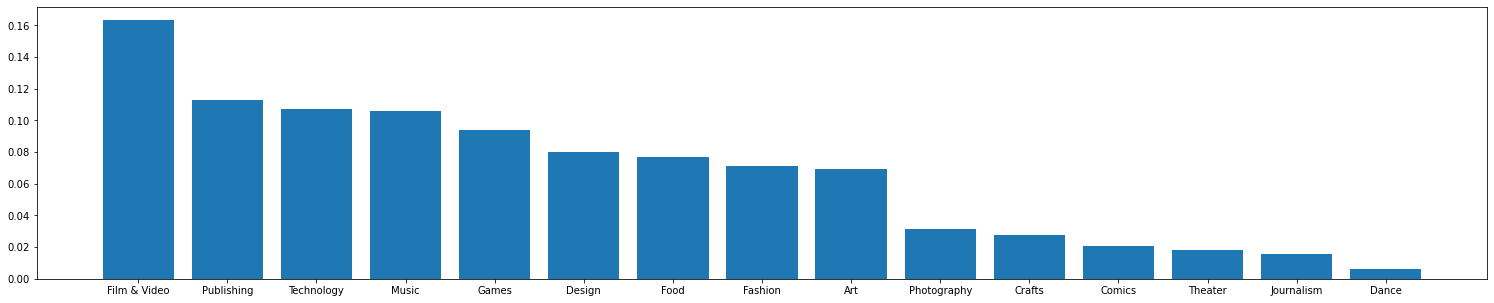

In [5]:
count = fail_df.main_category.value_counts(normalize=True)
print(count)
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(26,5))
plt.bar(count.index,count)
plt.show()

In [6]:
success_df = df[df["state"] == 1]
success_df

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
5,Monarch Espresso Bar,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,1.047500
6,Support Solar Roasted Coffee & Green Energy! ...,Food,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1.205000
11,Lisa Lim New CD!,Music,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,1,100,US,1.016000
14,Tombstone: Old West tabletop game and miniatur...,Games,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,1,761,GB,18.835000
18,Mike Corey's Darkness & Light Album,Music,2012-08-17,250.0,2012-08-02 14:11:32,250.00,1,7,US,1.000000
...,...,...,...,...,...,...,...,...,...,...
378642,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Games,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,1,35,FR,1.246000
378644,The Manual Bar Blade,Design,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,1,120,US,1.762571
378646,The Dog Coffee Book,Publishing,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,1,31,US,1.823179
378651,AT THE BEACH,Music,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,1,78,CA,1.100200


Music           0.178992
Film & Video    0.175167
Games           0.093635
Publishing      0.092128
Art             0.085584
Design          0.079376
Technology      0.049804
Theater         0.048079
Food            0.045841
Comics          0.043274
Fashion         0.042726
Photography     0.024518
Dance           0.017228
Crafts          0.016021
Journalism      0.007627
Name: main_category, dtype: float64


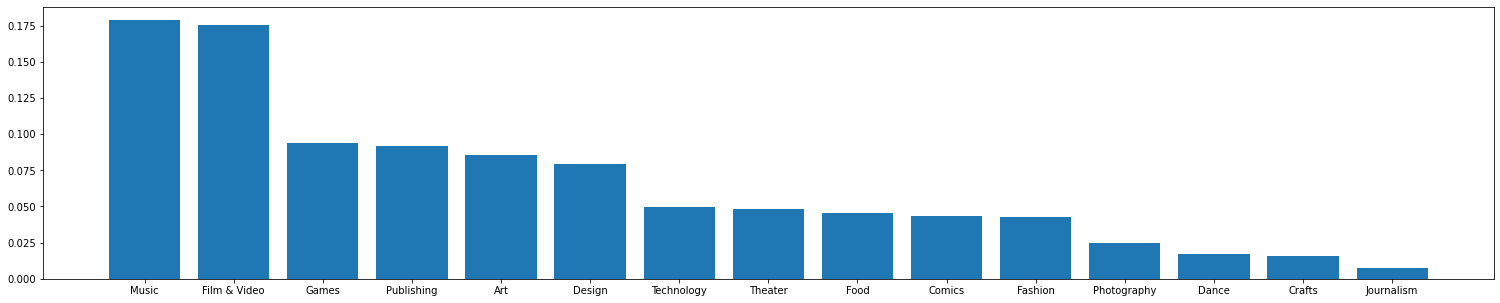

In [7]:
count = success_df.main_category.value_counts(normalize=True)
print(count)
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(26,5))
plt.bar(count.index,count)
plt.show()

In [8]:

Country_success_df = df[df["state"] == 1]
Country_success_df 

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
5,Monarch Espresso Bar,Food,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,1,224,US,1.047500
6,Support Solar Roasted Coffee & Green Energy! ...,Food,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,1,16,US,1.205000
11,Lisa Lim New CD!,Music,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,1,100,US,1.016000
14,Tombstone: Old West tabletop game and miniatur...,Games,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,1,761,GB,18.835000
18,Mike Corey's Darkness & Light Album,Music,2012-08-17,250.0,2012-08-02 14:11:32,250.00,1,7,US,1.000000
...,...,...,...,...,...,...,...,...,...,...
378642,ÉPOUVANTAILS : 28mm Figurines de jeux pour KIN...,Games,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,1,35,FR,1.246000
378644,The Manual Bar Blade,Design,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,1,120,US,1.762571
378646,The Dog Coffee Book,Publishing,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,1,31,US,1.823179
378651,AT THE BEACH,Music,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,1,78,CA,1.100200


US      0.811956
GB      0.090278
CA      0.031194
AU      0.015210
DE      0.007400
FR      0.007020
NL      0.004768
ES      0.003978
SE      0.003868
IT      0.003766
MX      0.003678
NZ      0.003356
DK      0.002749
HK      0.001835
IE      0.001594
SG      0.001506
CH      0.001470
NO      0.001243
BE      0.001199
AT      0.000892
N,0"    0.000775
LU      0.000146
JP      0.000117
Name: country, dtype: float64


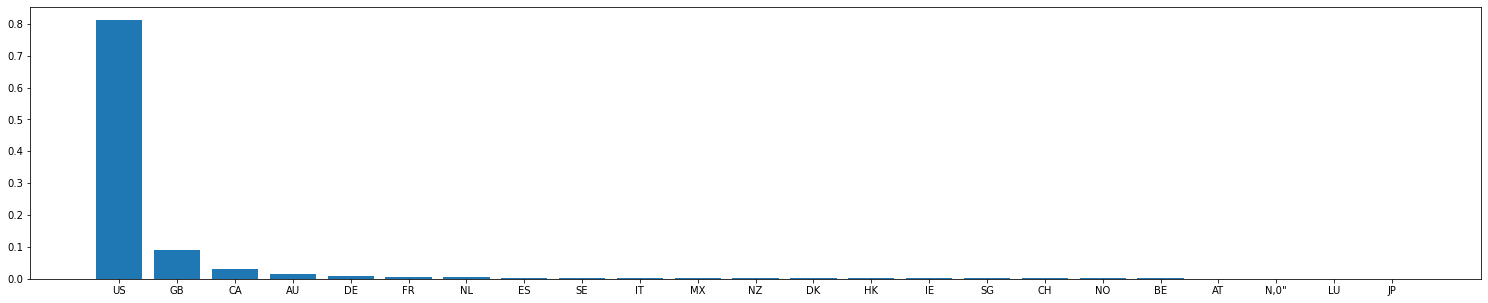

In [9]:
count = Country_success_df.country.value_counts(normalize=True)
print(count)
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(26,5))
plt.bar(count.index,count)
plt.show()

In [10]:
Country_fail_df = df[df["state"] == 0]
Country_fail_df 

,name,main_category,deadline,goal,launched,pledged,state,backers,country,goal rate
0,The Songs of Adelaide & Abullah,Publishing,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.000000
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,0.080700
2,Where is Hank?,Film & Video,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,0.004889
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,0.000200
4,Community Film Project: The Art of Neighborhoo...,Film & Video,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,0.065795
...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Film & Video,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,0.000500
378657,The Tribe,Film & Video,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,0.103333
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,0.001333
378659,BioDefense Education Kit,Technology,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,6,US,0.013333


US      0.762679
GB      0.089421
CA      0.043865
AU      0.023979
DE      0.013193
IT      0.009877
NL      0.009260
FR      0.008309
ES      0.007239
MX      0.005226
SE      0.005112
NZ      0.004131
DK      0.003057
IE      0.002478
CH      0.002321
NO      0.002249
AT      0.001983
BE      0.001882
HK      0.001471
SG      0.001450
N,0"    0.000537
LU      0.000178
JP      0.000101
Name: country, dtype: float64


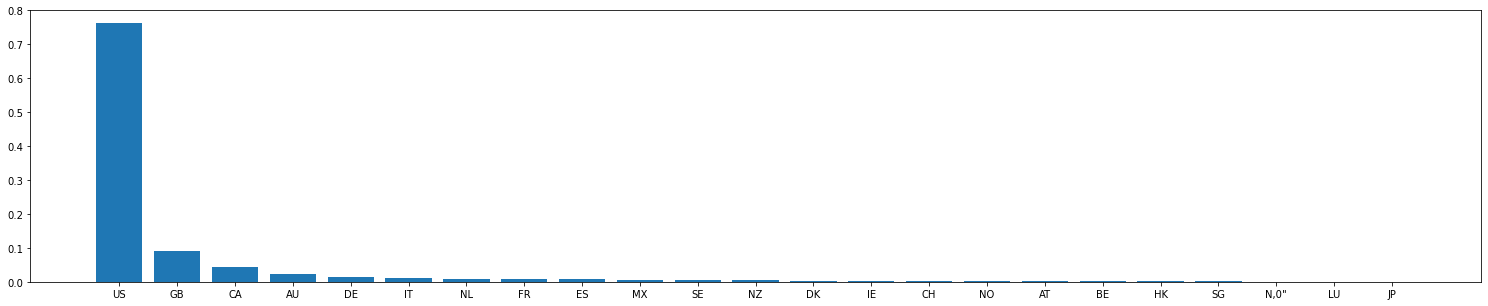

In [11]:
count = Country_fail_df.country.value_counts(normalize=True)
print(count)
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize=(26,5))
plt.bar(count.index,count)
plt.show()

In [19]:
G_county = df['country'].replace(['DE','IT','NL','FR','ES','MX','SE','NZ','DK','IE','CH','NO','AT','BE','HK','SG','N,0"','LU','JP'], 'Other', inplace=True)
df['country'].value_counts()

US       292627
GB        33672
Other     29767
CA        14756
AU         7839
Name: country, dtype: int64